In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer

import subtask3scorer

In [115]:
CLASSES = subtask3scorer.read_techniques_list_from_file('techniques_subtask3.txt')

In [116]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14, ignoreNN=False):
    
    # Remove value where true and predicted labels are false
    if ignoreNN:
        ignoreNNMatrix = np.copy(confusion_matrix)
        ignoreNNMatrix[0, 0] = 0

        df_cm = pd.DataFrame(
            ignoreNNMatrix, index=class_names, columns=class_names,
        )

    else:
        df_cm = pd.DataFrame(
            confusion_matrix, index=class_names, columns=class_names,
        )

    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes, cmap='Blues')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title(class_label)

In [121]:
def plot_cm(pred_file, gold_file, classes, ignoreNN=False):
    # Get prediction values (y_pred) and gold values (y_true)
    # Note that the values are multilabel
    pred_labels = subtask3scorer._read_csv_input_file(pred_file)
    gold_labels = subtask3scorer._read_csv_input_file(gold_file)
    pred_values, gold_values = subtask3scorer._extract_matching_lists(pred_labels, gold_labels) 

    # Transform labels to binary array
    mlb = MultiLabelBinarizer()
    mlb.fit_transform([classes])
    classes = mlb.classes_
    gold_values = mlb.transform(gold_values)
    pred_values = mlb.transform(pred_values)

    # Create confusion matrix for each class
    confusion_matrix = metrics.multilabel_confusion_matrix(gold_values, pred_values)

    # Generate plot
    fig, ax = plt.subplots(6, 4, figsize=(12, 12))
    ax[-1, -1].axis('off')
        
    for axes, cfs_matrix, label in zip(ax.flatten(), confusion_matrix, classes):
        print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"], ignoreNN=ignoreNN)

    fig.tight_layout()
    plt.subplots_adjust(hspace=1.2)
    plt.show()

In [122]:
pred_file = 'Newpred_en_rob.txt'
gold_file = '../data/en/dev-labels-subtask-3.txt'

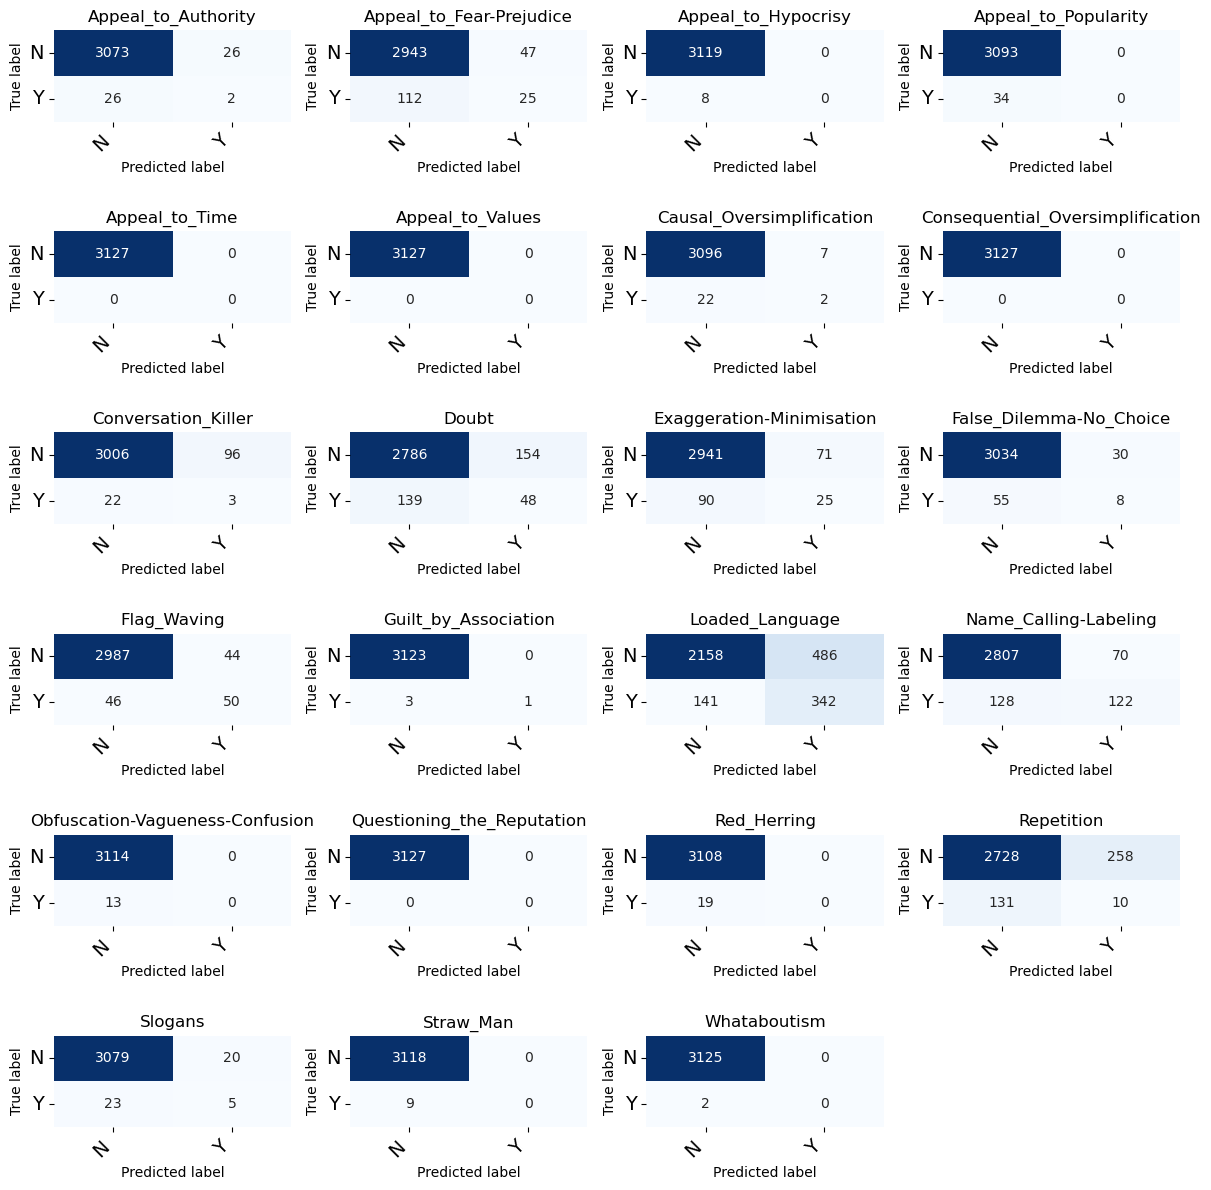

In [123]:
plot_cm(pred_file, gold_file, CLASSES)

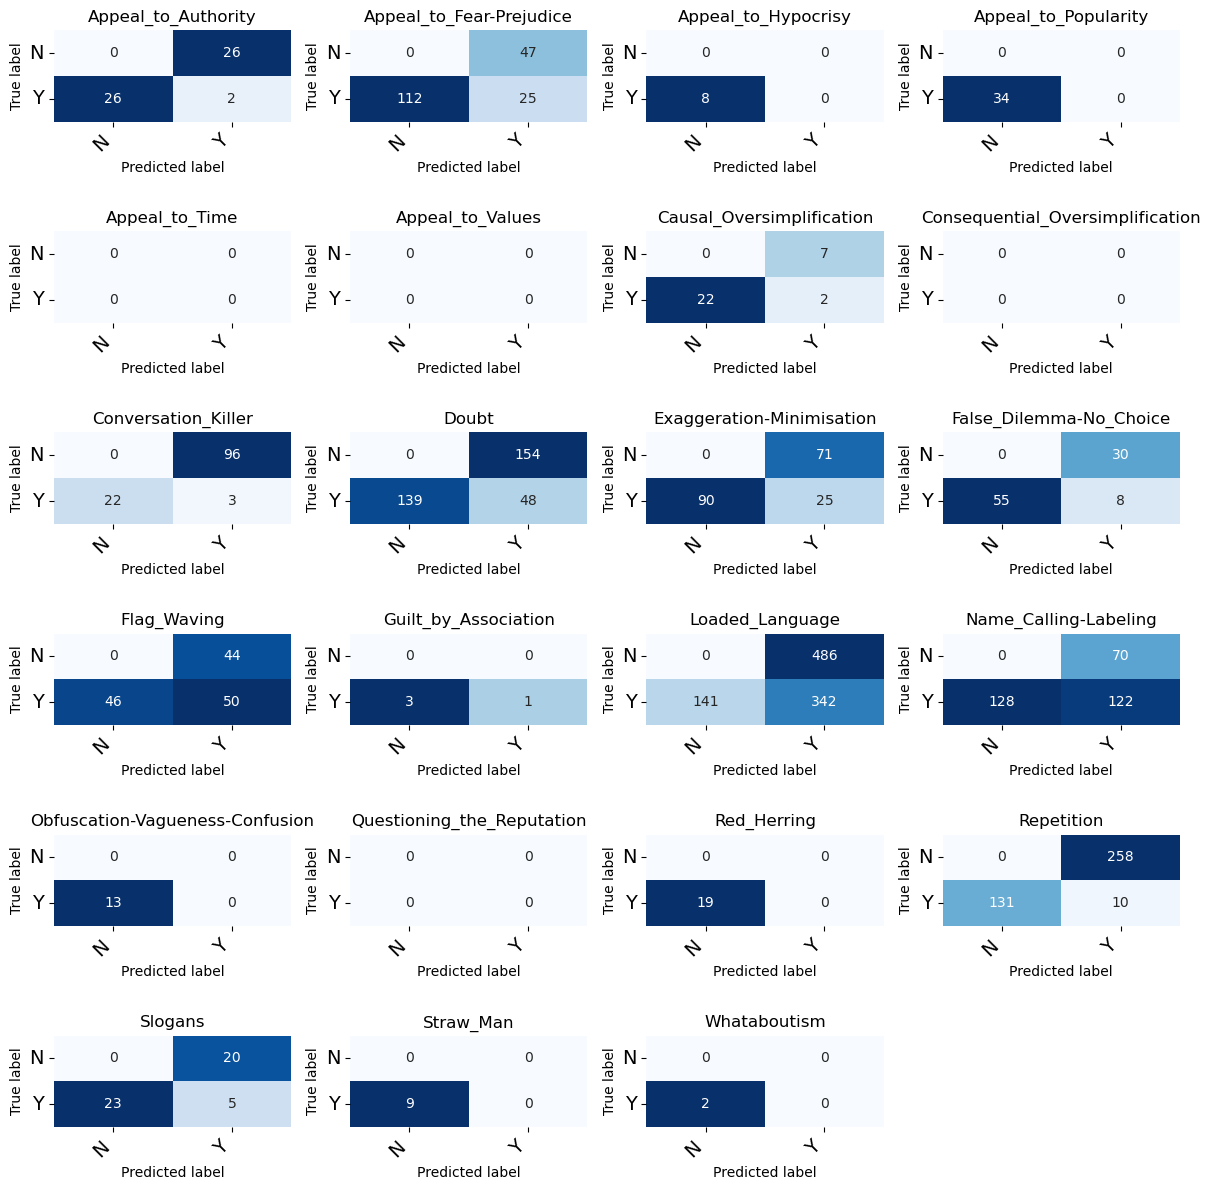

In [125]:
plot_cm(pred_file, gold_file, CLASSES, ignoreNN=True)

In [126]:
pred_file = 'DEV_noSample_pred_en.txt'
gold_file = '../data/en/dev-labels-subtask-3.txt'

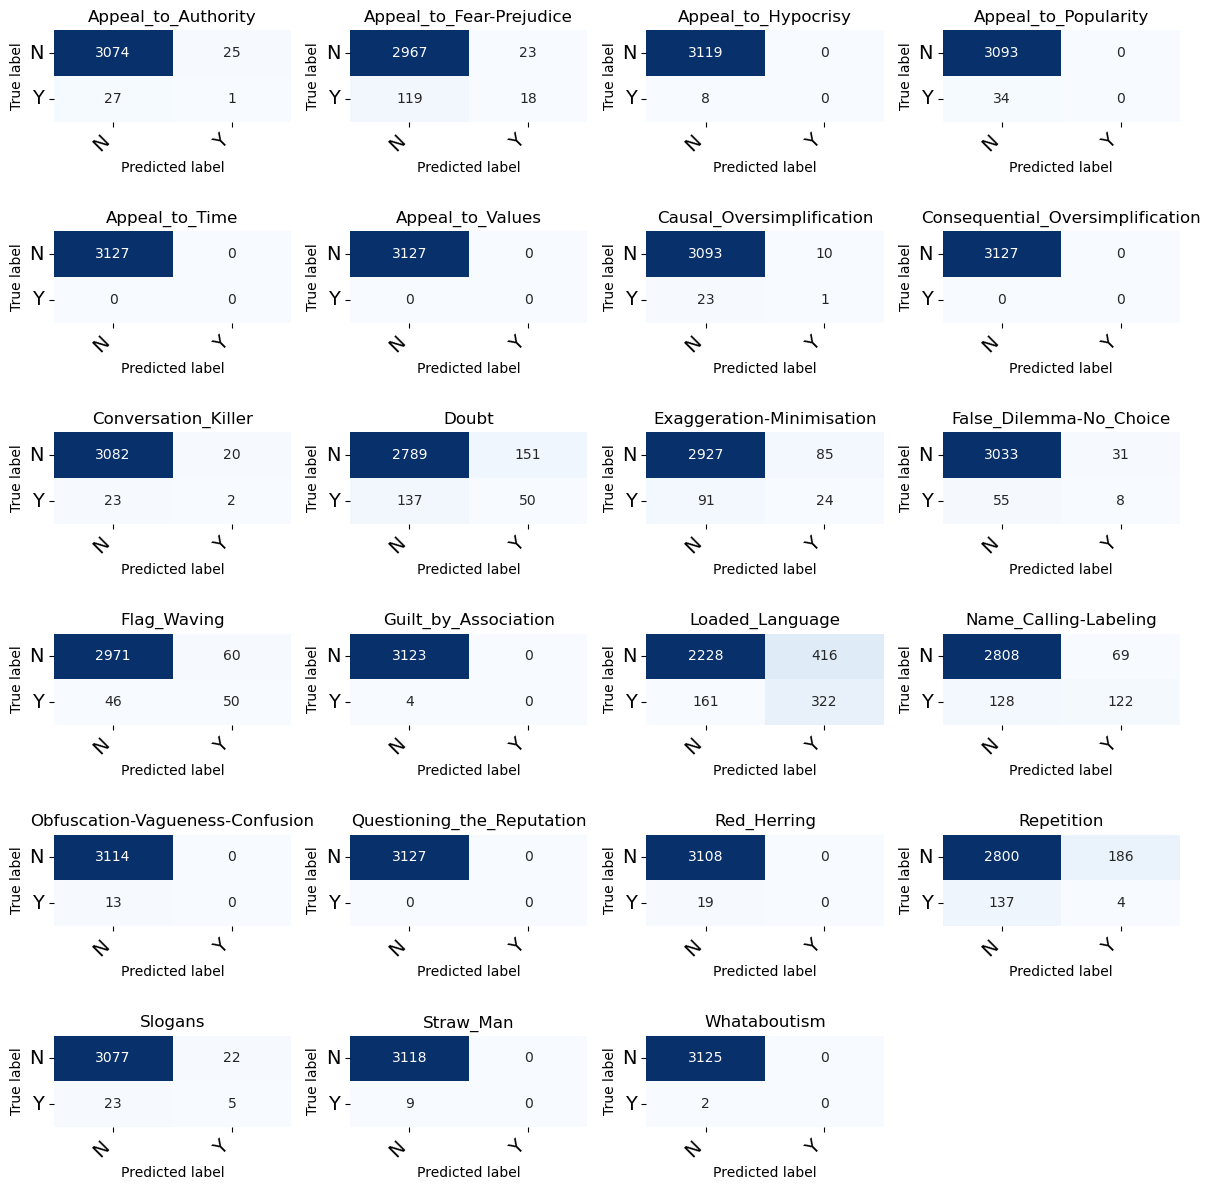

In [127]:
plot_cm(pred_file, gold_file, CLASSES)

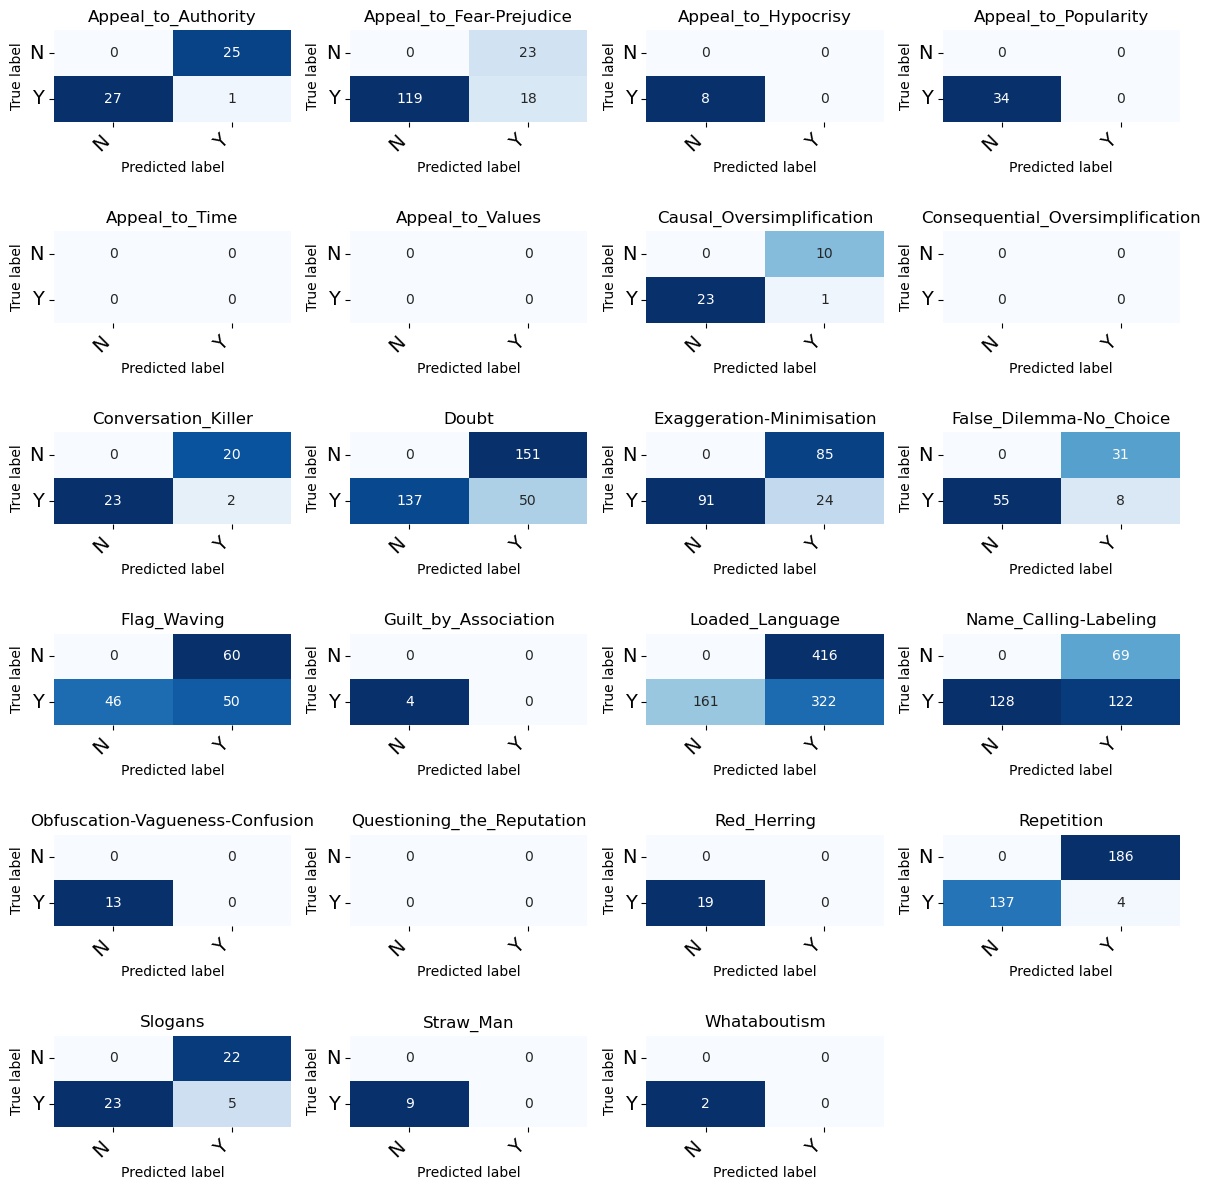

In [128]:
plot_cm(pred_file, gold_file, CLASSES, ignoreNN=True)